In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,accuracy_score,recall_score,precision_score

In [156]:
cd D:\FINGERTIPS DATA SCIENCE\READING MATERIALS\PROJECTS\PYTHON_ML\PROJECT-8 Python Naive Bayes Classification Loan Status

D:\FINGERTIPS DATA SCIENCE\READING MATERIALS\PROJECTS\PYTHON_ML\PROJECT-8 Python Naive Bayes Classification Loan Status


# Part-1: Data Exploration and Pre-processing

In [154]:
# 1) load the given dataset
df=pd.read_csv("Python_Project_8_Nai.csv")

In [5]:
df.head()

,ID,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default Status
0,1,2.0,24,3913.0,312.0,689.0,NaN,NaN,NaN,NaN,689.0,NaN,NaN,NaN,NaN,Default
1,2,12.0,26,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,NaN,1.0,1.0,1.0,NaN,2.0,Default
2,3,9.0,34,29239.0,1427.0,13559.0,14331.0,14948.0,15549.0,1518.0,15.0,1.0,1.0,1.0,5.0,Not Default
3,4,5.0,37,4699.0,48233.0,49291.0,28314.0,28959.0,29547.0,2.0,219.0,12.0,11.0,169.0,1.0,Not Default
4,5,5.0,57,8617.0,567.0,35835.0,294.0,19146.0,19131.0,2.0,36681.0,1.0,9.0,689.0,679.0,Not Default


In [7]:
df.shape

(30000, 16)

In [8]:
# 2) check the null values
df.isnull().sum()

ID                   0
LIMIT_BAL            0
AGE                  0
BILL_AMT1         2008
BILL_AMT2         2506
BILL_AMT3         2870
BILL_AMT4         3195
BILL_AMT5         3506
BILL_AMT6         4020
PAY_AMT1          5249
PAY_AMT2          5396
PAY_AMT3          5968
PAY_AMT4          6408
PAY_AMT5          6703
PAY_AMT6          7173
Default Status       0
dtype: int64

In [9]:
# 3) print the column names
df.columns

Index(['ID', 'LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
       'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'Default Status'],
      dtype='object')

In [32]:
# 4) create list for all the columns which have null values columns
list = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']  
print(list)
    

['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']


In [33]:
# 5) fill all the null values with mean using for loops
for i in list:
    df[i]=df[i].fillna(df[i].mean())

In [34]:
df.isnull().sum()

ID                0
LIMIT_BAL         0
AGE               0
BILL_AMT1         0
BILL_AMT2         0
BILL_AMT3         0
BILL_AMT4         0
BILL_AMT5         0
BILL_AMT6         0
PAY_AMT1          0
PAY_AMT2          0
PAY_AMT3          0
PAY_AMT4          0
PAY_AMT5          0
PAY_AMT6          0
Default Status    0
dtype: int64

In [36]:
# 6) get data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              30000 non-null  int64  
 1   LIMIT_BAL       30000 non-null  float64
 2   AGE             30000 non-null  int64  
 3   BILL_AMT1       30000 non-null  float64
 4   BILL_AMT2       30000 non-null  float64
 5   BILL_AMT3       30000 non-null  float64
 6   BILL_AMT4       30000 non-null  float64
 7   BILL_AMT5       30000 non-null  float64
 8   BILL_AMT6       30000 non-null  float64
 9   PAY_AMT1        30000 non-null  float64
 10  PAY_AMT2        30000 non-null  float64
 11  PAY_AMT3        30000 non-null  float64
 12  PAY_AMT4        30000 non-null  float64
 13  PAY_AMT5        30000 non-null  float64
 14  PAY_AMT6        30000 non-null  float64
 15  Default Status  30000 non-null  object 
dtypes: float64(13), int64(2), object(1)
memory usage: 3.7+ MB


In [37]:
# 7) describe dataset
df.describe()

,ID,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000
mean,10666.660700,14.648867,32.427900,33989.494570,33938.750418,32617.867011,30709.50416,29015.123424,28526.276559,2613.957537,2.922762e+03,2584.508988,2250.186122,2300.375885,2608.765760
std,9698.091793,189.496507,12.718991,59472.881131,58305.224138,55777.906879,51825.29715,48612.594594,48042.412239,11398.052166,1.675277e+04,10956.873040,9805.177073,9756.444917,11652.208534
min,1.000000,1.000000,3.000000,-154973.000000,-69777.000000,-157264.000000,-81334.00000,-81334.000000,-94625.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000
25%,1850.500000,4.000000,26.000000,1788.000000,1847.750000,1862.000000,1782.00000,1718.000000,1724.000000,21.000000,1.900000e+01,15.000000,13.000000,13.000000,15.000000
50%,7483.500000,9.000000,33.000000,11569.000000,12637.000000,13255.000000,13350.00000,12847.000000,13398.500000,512.000000,5.150000e+02,431.000000,367.000000,387.000000,478.000000
75%,18746.250000,21.000000,41.000000,33989.494570,33938.750418,32617.867011,30709.50416,29015.123424,28526.276559,2613.957537,2.922762e+03,2584.508988,2250.186122,2300.375885,2608.765760
max,29999.000000,32768.000000,79.000000,964511.000000,983931.000000,693131.000000,891586.00000,927171.000000,961664.000000,873552.000000,1.684259e+06,417588.000000,528897.000000,426529.000000,528666.000000


<AxesSubplot:>

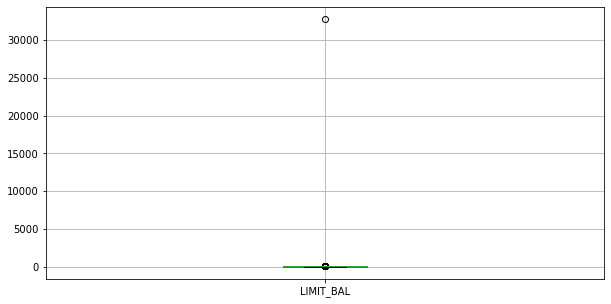

In [43]:
# 8) display box plot for LIMIT_BAL
df.boxplot("LIMIT_BAL",figsize=(10,5))

<AxesSubplot:>

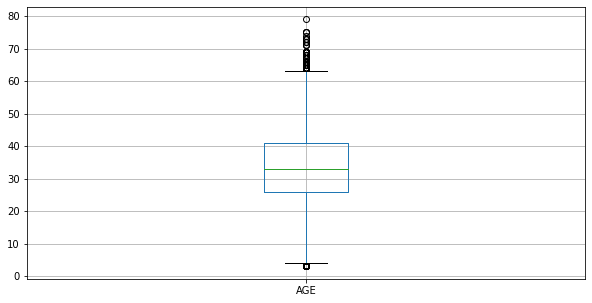

In [44]:
# 9) display box plot for age
df.boxplot("AGE",figsize=(10,5))

In [ ]:
# 10) drop all the null values


In [49]:
# 11) perform encoding on default status
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()

In [50]:
df["Default Status"] = labelencoder.fit_transform(df["Default Status"])  

In [51]:
df.head()

,ID,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default Status
0,1,2.0,24,3913.0,312.0,689.0,30709.50416,29015.123424,28526.276559,2613.957537,689.0,2584.508988,2250.186122,2300.375885,2608.76576,0
1,2,12.0,26,2682.0,1725.0,2682.0,3272.00000,3455.000000,3261.000000,2613.957537,1.0,1.000000,1.000000,2300.375885,2.00000,0
2,3,9.0,34,29239.0,1427.0,13559.0,14331.00000,14948.000000,15549.000000,1518.000000,15.0,1.000000,1.000000,1.000000,5.00000,1
3,4,5.0,37,4699.0,48233.0,49291.0,28314.00000,28959.000000,29547.000000,2.000000,219.0,12.000000,11.000000,169.000000,1.00000,1
4,5,5.0,57,8617.0,567.0,35835.0,294.00000,19146.000000,19131.000000,2.000000,36681.0,1.000000,9.000000,689.000000,679.00000,1


# Part-2: Working with Models


In [58]:
# 1) Create a features and target dataset
x=df.drop(["Default Status"],axis=1)
y=df["Default Status"]

In [59]:
x
x.shape

(30000, 15)

In [60]:
y
y.shape

(30000,)

In [135]:
# 2) Split data into training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.9,random_state=0)

In [136]:
x_train
x_train.shape

(27000, 15)

In [137]:
x_test
x_test.shape

(3000, 15)

In [139]:
y_train
y_train.shape

(27000,)

In [140]:
y_test
y_test.shape

(3000,)

In [141]:
# 3) Fit the Gaussian naive bayes classifier
from sklearn.naive_bayes import GaussianNB

In [142]:
nb = GaussianNB()

In [143]:
nb.fit(x_train,y_train)

GaussianNB()

In [144]:
y_predicted=nb.predict(x_test)
y_predicted

array([1, 1, 1, ..., 1, 1, 1])

In [145]:
# 4) Print the training and
nb.score(x_train,y_train)

0.7575185185185185

In [146]:
# 5) Print the testing score
nb.score(x_test,y_test)

0.764

In [147]:
# 6) Find the accuracy score,
accuracy_score(y_test,y_predicted)

0.764

In [148]:
# 7) Find the precision score,
precision_score(y_test,y_predicted)

0.7838487972508591

In [149]:
# 8) Find the recall score
recall_score(y_test,y_predicted)

0.9665254237288136

In [150]:
# 9) Find the Confusion matrix
from sklearn.metrics import confusion_matrix

In [151]:
confusion_matrix(y_test,y_predicted)

array([[  11,  629],
       [  79, 2281]], dtype=int64)

In [152]:
# 10) Find the Classification report
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.12      0.02      0.03       640
           1       0.78      0.97      0.87      2360

    accuracy                           0.76      3000
   macro avg       0.45      0.49      0.45      3000
weighted avg       0.64      0.76      0.69      3000



# if drop all null values

In [168]:
dff=pd.read_csv("Python_Project_8_Nai.csv")
dff.head()

,ID,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default Status
0,1,2.0,24,3913.0,312.0,689.0,NaN,NaN,NaN,NaN,689.0,NaN,NaN,NaN,NaN,Default
1,2,12.0,26,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,NaN,1.0,1.0,1.0,NaN,2.0,Default
2,3,9.0,34,29239.0,1427.0,13559.0,14331.0,14948.0,15549.0,1518.0,15.0,1.0,1.0,1.0,5.0,Not Default
3,4,5.0,37,4699.0,48233.0,49291.0,28314.0,28959.0,29547.0,2.0,219.0,12.0,11.0,169.0,1.0,Not Default
4,5,5.0,57,8617.0,567.0,35835.0,294.0,19146.0,19131.0,2.0,36681.0,1.0,9.0,689.0,679.0,Not Default


In [169]:
dff=dff.dropna()

In [170]:
dff.shape

(15336, 16)

In [187]:
from sklearn.preprocessing import LabelEncoder

In [188]:
labelencoder=LabelEncoder()

In [189]:
dff["Default Status"] =labelencoder.fit_transform(dff["Default Status"])

In [190]:
dff["Default Status"].unique()

array([1, 0], dtype=int64)

In [192]:
X=dff.drop("Default Status",axis=1)
Y=dff["Default Status"]

In [177]:
from sklearn.model_selection import train_test_split

In [302]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.5,random_state=30)

In [303]:
X_train
X_train.shape

(7668, 15)

In [304]:
X_test
X_test.shape

(7668, 15)

In [305]:
Y_train
Y_train.shape

(7668,)

In [306]:
Y_test
Y_test.shape

(7668,)

In [307]:
from sklearn.naive_bayes import GaussianNB

In [308]:
model=GaussianNB()

In [309]:
model.fit(X_train,Y_train)

GaussianNB()

In [310]:
model.score(X_train,Y_train)

0.769170579029734

In [311]:
model.score(X_test,Y_test)

0.7777777777777778

In [312]:
Y_predicted=model.predict(X_test)

In [321]:
Y_predicted

array([0, 1, 1, ..., 0, 0, 1], dtype=int64)

In [324]:
model.predict_proba(X_test)

array([[0.53609655, 0.46390345],
       [0.42169606, 0.57830394],
       [0.38710808, 0.61289192],
       ...,
       [0.85630953, 0.14369047],
       [0.58018509, 0.41981491],
       [0.25767595, 0.74232405]])

In [320]:
print("accuracy score is = {:.02f}".format(accuracy_score(Y_test,Y_predicted)))

accuracy score is = 0.78


In [314]:
print(classification_report(Y_test,Y_predicted))

              precision    recall  f1-score   support

           0       0.17      0.15      0.16      1081
           1       0.86      0.88      0.87      6587

    accuracy                           0.78      7668
   macro avg       0.52      0.51      0.52      7668
weighted avg       0.77      0.78      0.77      7668

